# Instalar Tensorflow

In [ ]:
# 1er paso: debe instalar el módulo tensorflow_text 
##
##  - Si trabaja en la nube a través de Google Colab, este paso debe hacerlo cada vez que se conecta a una máquina
##
##  - Si trabaja localmente en su computador, este paso debe hacerlo una sola vez.
##    - Si es la primera vez que va utilizar un módulo (package) que tiene como parte de su nombre "tensorflow", 
##      es probable que deba instalar previamente el módulo tensorflow y tensorflow_hub
## 
 
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.6 MB 41.4 MB/s 
     |████████████████████████████████| 511.7 MB 7.0 kB/s 
     |████████████████████████████████| 5.8 MB 65.9 MB/s 
     |████████████████████████████████| 1.6 MB 66.3 MB/s 
     |████████████████████████████████| 438 kB 61.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Unins

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 2do paso: importe los siguientes módulos:

import pandas as pd
import numpy as np
import tensorflow_hub as hub
import tensorflow_text as text
from bs4 import BeautifulSoup # para trabajar texto en varios formatos
import re # expresiones regulares

#importar datos


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Magister/4° Semestre/Consultoria/Modelos de clasificacion previos/SMSSpamCollection(Filtrada).csv",sep= ";")

In [ ]:
df

,resultado,mensaje
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,spam,FreeMsg Hey there darling it's been 3 week's n...
2,ham,As per your request 'Melle Melle (Oru Minnamin...
3,spam,WINNER!! As a valued network customer you have...
4,spam,Had your mobile 11 months or more? U R entitle...
...,...,...
1285,spam,Had your contract mobile 11 Mnths? Latest Moto...
1286,ham,Yeh. Indians was nice. Tho it did kane me off ...
1287,spam,REMINDER FROM O2: To get 2.50 pounds free call...
1288,spam,This is the 2nd time we have tried 2 contact u...


#Análisis exploratorio

In [ ]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#funcion resumen de un dataframe

def resumen(data):
  total_perdidos = data.isnull().sum().sum()
  missing_percent = data.isnull().sum()*100 /len(data)
  total_missing = data.isnull().sum()
  unique = data.nunique()
  not_null = data.notnull().sum()
  df = pd.DataFrame({
      'Valores Unicos' : unique,
      'Valores Existentes': not_null,
      'Total perdidos': total_missing,
      'Porc. perdidos %': missing_percent
  })
  tipos = data.dtypes
  numericas = tipos[tipos != object].index
  no_numericas = tipos[tipos == object].index
  print('1. Las dimensiones de la data:', data.shape)
  print('2. Total Datos perdidos son:', total_perdidos)
  print('3. La cantidad de variables numericas es: ', len(numericas), '\n   Y ellas son:\n', numericas)
  print('4. La cantidad de variables NO numericas es: ', len(no_numericas), '\n  Y ellas son:\n', no_numericas)
  df = df.round(2)
  return(df)

In [ ]:
resumen(df)

1. Las dimensiones de la data: (1290, 2)
2. Total Datos perdidos son: 0
3. La cantidad de variables numericas es:  0 
   Y ellas son:
 Index([], dtype='object')
4. La cantidad de variables NO numericas es:  2 
  Y ellas son:
 Index(['resultado', 'mensaje'], dtype='object')


,Valores Unicos,Valores Existentes,Total perdidos,Porc. perdidos %
resultado,2,1290,0,0.0
mensaje,1148,1290,0,0.0


In [ ]:
df.groupby('resultado').size()

resultado
ham     668
spam    622
dtype: int64

ham     668
spam    622
Name: resultado, dtype: int64


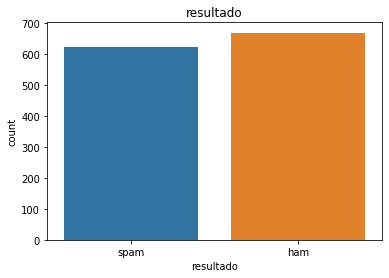

In [ ]:
sns.countplot(df['resultado'])
print(df['resultado'].value_counts())
plt.title("resultado")
plt.show()

In [ ]:
for i in df:
  print(i, len(df[i].unique()))

resultado 2
mensaje 1148


Debemos etiquetar a los textos convertidos a vectores

In [ ]:
df['resultado']

0       spam
1       spam
2        ham
3       spam
4       spam
        ... 
1285    spam
1286     ham
1287    spam
1288    spam
1289     ham
Name: resultado, Length: 1290, dtype: object

# Preprocesamiento de texto


In [ ]:
df

,resultado,mensaje
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,spam,FreeMsg Hey there darling it's been 3 week's n...
2,ham,As per your request 'Melle Melle (Oru Minnamin...
3,spam,WINNER!! As a valued network customer you have...
4,spam,Had your mobile 11 months or more? U R entitle...
...,...,...
1285,spam,Had your contract mobile 11 Mnths? Latest Moto...
1286,ham,Yeh. Indians was nice. Tho it did kane me off ...
1287,spam,REMINDER FROM O2: To get 2.50 pounds free call...
1288,spam,This is the 2nd time we have tried 2 contact u...


In [ ]:
df['resultado'] = df['resultado'].apply(lambda x:1 if x == 'ham' else 0) 

In [ ]:
df

,resultado,mensaje
0,0,Free entry in 2 a wkly comp to win FA Cup fina...
1,0,FreeMsg Hey there darling it's been 3 week's n...
2,1,As per your request 'Melle Melle (Oru Minnamin...
3,0,WINNER!! As a valued network customer you have...
4,0,Had your mobile 11 months or more? U R entitle...
...,...,...
1285,0,Had your contract mobile 11 Mnths? Latest Moto...
1286,1,Yeh. Indians was nice. Tho it did kane me off ...
1287,0,REMINDER FROM O2: To get 2.50 pounds free call...
1288,0,This is the 2nd time we have tried 2 contact u...


## Limpieza de datos

In [ ]:
# El código anterior me trae la última versión de keras
try:
  %tensorflow_version 2.x
except Exception:
  pass
  
import tensorflow as tf

from tensorflow.keras import layers # importar layers desde keras

import tensorflow_datasets as tfds # este me trae los tokens

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
def clean_tweet(tweet):

  tweet= BeautifulSoup(tweet,"lxml").get_text() # sirve para trabajar en un formato especial de tratar el texto. hay que usar el get_text para que me lo devuela en un formato legible
  
  # Dejamos todo en minúscula
  tweet = tweet.lower()
  # Reemplazamos puntos por espacios
  tweet = tweet.replace("."," ")
  # Eliminamos la @ y su mención
  tweet = re.sub(r"@[A-Za-z0-9.]+",' ',tweet) # después del @ puede leer lo que se encuentra en el []. El + significa. El r significa raw o string
  # Eliminamos los links de la URLs
  tweet = re.sub(r"https?://[A-Za-z0-9./]+",' ', tweet) # aqui el ? me dice que el caracter anterior puede estar o no
  # Nos quedamos solo con los caracteres
  tweet = re.sub(r"[^a-zA-Z.!?']",' ',tweet)# cualquier cosa que no sea lo que viene después de ^ se va a sustituir por espacios en blanco
  # Eliminamos los sitios web
  tweet = re.sub(r"www[A-Za-z0-9./]+",' ', tweet)
  # Eliminamos espacios en blanco adicionales
  tweet = re.sub(r" +",' ',tweet)# si existe más de un espacio en blanco lo reemplazamos por uno solo. El más me dice eso, si hay más de uno reemplazo
  return tweet

In [ ]:
df_clean = [clean_tweet(tweet) for tweet in df.mensaje] # esto me queda en una lista guardado

In [ ]:
df_clean

["free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c's apply over 's",
 "freemsg hey there darling it's been week's now and no word back! i'd like some fun you up for it still? tb ok! xxx std chgs to send to rcv",
 "as per your request 'melle melle oru minnaminunginte nurungu vettam ' has been set as your callertune for all callers press to copy your friends callertune",
 'winner!! as a valued network customer you have been selected to receivea prize reward! to claim call claim code kl valid hours only ',
 'had your mobile months or more? u r entitled to update to the latest colour mobiles with camera for free! call the mobile update co free on ',
 'six chances to win cash! from to pounds txt csh and send to cost p day days tsandcs apply reply hl info',
 'urgent! you have won a week free membership in our prize jackpot! txt the word claim to no t c www dbuk net lccltd pobox ldnw a rw ',
 'xxxmobilemovieclub to use your credit

# transformar texto (Embedding)

In [ ]:
# 4to paso: Vamos a crear dos variables que cargaran en memoria dos funciones para transformar el texto
##
##   - preprocessor: "objeto" que se encargará de transformar el texto en el formato que necesita el modelo BERT para funcionar
##   - encoder: "objeto" que será el modelo BERT y se alimentará del resultado de preprocessor, retornando el texto transformado en un vector numérico.

preprocessor = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder = hub.load("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/2")

In [ ]:
# 5to paso: Vamos a usar el objeto preprocessor, y guardamos su resultado en la variable embedding
##   A modo de ejemplo para su revisión, solo vamos a transformar dos textos:

embedding = preprocessor(df_clean) # df_clean es el texto

In [ ]:
# 6to paso: Vamos a codificar el texto con el modelo BERT:
##   - Fijarse que el objeto encoder recibe como argumento la variable embedding (resultado de preprocessor)
##   - Copiar el siguiente código de forma literal

pooled_output = encoder(embedding)["pooled_output"]

In [ ]:
# Opcional: revisamos el contenido de la variable pooled_output, el cual tiene dos vectores de 128 dimensiones
##
##    - Dos vectores, porque le pasamos solo dos textos
##    - 128 dimensiones, porque el modelo BERT utilizado convierte cualquier texto (independiente del largo) en un vector numérico de 128 dimensiones.

pooled_output

<tf.Tensor: shape=(1290, 128), dtype=float32, numpy=
array([[-0.999942  , -0.00141432, -0.9810854 , ...,  0.98082685,
         0.98178196,  0.96391606],
       [-0.9991202 ,  0.05296545, -0.98559695, ...,  0.9239925 ,
         0.9558225 ,  0.9984839 ],
       [-0.99986243,  0.03978845, -0.9731644 , ...,  0.73242617,
         0.97078604,  0.9766909 ],
       ...,
       [-0.99998385,  0.03318281, -0.9955043 , ...,  0.95926076,
         0.9974624 ,  0.96427304],
       [-0.9999856 ,  0.1223898 , -0.9896996 , ...,  0.98565143,
         0.96824807,  0.9937904 ],
       [-0.9996448 ,  0.09184256, -0.9976637 , ...,  0.90646094,
         0.9652779 ,  0.99890375]], dtype=float32)>

In [ ]:
# 7mo paso: El contenido de la variable pooled_output es una estructura de datos de tipo tensorflow.
#           Para transformarlo a un dataframe y usarlo de forma tradicional con los modelos clásicos, 
#           ejecutamos la siguiente linea de código:

dataX2 = pd.DataFrame(pooled_output.numpy())

In [ ]:
# Opcional:  Ahora la variable dataX es un dataframe y podemos revisar su dimensionalidad y visualizarlo:
dataX2.shape

(1290, 128)

In [ ]:
dataX2

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.999942,-0.001414,-0.981085,-0.484473,-0.948341,0.171350,-0.981562,-0.706304,-0.006808,-0.095359,...,0.128026,-0.990112,0.187941,-0.998624,-0.819512,0.877467,-0.999149,0.980827,0.981782,0.963916
1,-0.999120,0.052965,-0.985597,0.318218,-0.978574,-0.563376,-0.998118,0.185895,0.121993,0.005437,...,0.155417,-0.251321,0.236179,-0.999170,-0.642842,0.981704,-0.992995,0.923993,0.955823,0.998484
2,-0.999862,0.039788,-0.973164,0.168508,-0.969527,-0.213720,-0.988347,-0.972103,-0.031048,-0.025507,...,0.133916,-0.986624,0.169207,-0.999534,-0.628558,0.798255,-0.977197,0.732426,0.970786,0.976691
3,-0.999984,0.044671,-0.993844,0.591809,-0.880615,0.781171,-0.973504,-0.696313,0.135529,-0.005958,...,0.142242,-0.995556,0.196146,-0.998720,-0.586202,0.946417,-0.997387,0.998785,0.998541,0.884596
4,-0.999940,0.095895,-0.997162,-0.121784,-0.996297,0.846379,-0.994946,0.436924,0.035794,-0.006821,...,0.215716,-0.989526,0.178496,-0.999673,-0.879214,0.881079,-0.998047,0.986704,0.997149,0.974610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,-0.999978,0.044769,-0.996063,0.206673,-0.993597,0.577214,-0.994746,0.505085,0.094988,0.063025,...,0.203866,-0.998053,0.137735,-0.999817,-0.956234,0.923886,-0.996958,0.989620,0.994490,0.967436
1286,-0.999188,0.034496,-0.990960,0.951374,-0.999831,-0.388626,-0.997586,0.758842,0.070556,0.052468,...,0.134165,-0.782383,0.201555,-0.999390,-0.920580,0.792196,-0.945352,0.811551,0.946749,0.997387
1287,-0.999984,0.033183,-0.995504,0.454196,-0.921501,-0.103736,-0.989906,-0.962311,-0.030409,-0.049869,...,0.104561,-0.996887,0.170619,-0.999599,-0.375127,0.962274,-0.997076,0.959261,0.997462,0.964273
1288,-0.999986,0.122390,-0.989700,0.519770,-0.975490,0.565476,-0.979562,-0.951744,0.093162,-0.001901,...,0.189051,-0.991586,0.195924,-0.999426,-0.709937,0.916501,-0.998173,0.985651,0.968248,0.993790


#seleccion de las variable

In [ ]:
X = dataX2 
Y = df['resultado'].copy()

In [ ]:
X.columns

RangeIndex(start=0, stop=128, step=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Columns: 128 entries, 0 to 127
dtypes: float32(128)
memory usage: 645.1 KB


In [ ]:
Y.head()

0    0
1    0
2    1
3    0
4    0
Name: resultado, dtype: int64

# Balanceo de datos

## Aplicando Smote

In [ ]:
from imblearn.over_sampling import SMOTE #over sobre nivelar hacia arriba under nivelacion hacia el menor dato
#from imblearn.under_sampling import SMOTE 

smote = SMOTE(random_state = 325, n_jobs=-1)
X_smote, Y_smote = smote.fit_resample(X, Y)# hace Balance de los datos a partir de los agreglos

from collections import Counter

Counter(Y_smote)

Counter({0: 668, 1: 668})

# Train y test

In [ ]:
from sklearn.model_selection import train_test_split
X_train_smote, X_test_smote, Y_train_smote, Y_test_smote = train_test_split(X_smote, Y_smote, random_state=325,test_size = 0.3)
        
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=325,test_size = 0.3)        

# SVM


##SVC 

### Caso 1

In [ ]:
parametros = {'C'      : np.arange(1, 5, 1),
            'gamma'  : np.arange(1, 5, 1),
           'kernel' : ['rbf', 'linear','sigmoid']}

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clf = SVC(class_weight='balanced', random_state=325)  
grid_search = GridSearchCV(clf, parametros, n_jobs=-1, cv=5) 

In [ ]:
grid_search.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=325),
             n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4]), 'gamma': array([1, 2, 3, 4]),
                         'kernel': ['rbf', 'linear', 'sigmoid']})

In [ ]:
print('El mejor modelo:\n', grid_search.best_params_)

El mejor modelo:
 {'C': 2, 'gamma': 1, 'kernel': 'linear'}


In [ ]:
clf_best = grid_search.best_estimator_
pred = clf_best.predict(X_test_smote)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_smote, pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       212
           1       0.93      0.92      0.92       189

    accuracy                           0.93       401
   macro avg       0.93      0.92      0.92       401
weighted avg       0.93      0.93      0.93       401



Matriz de Confusión
[[198  14]
 [ 16 173]]


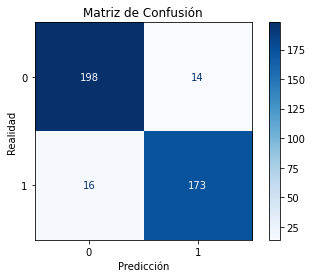

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay.from_estimator(
       clf_best,
       X_test_smote,
       Y_test_smote,
       display_labels=None,
       cmap=plt.cm.Blues,
       normalize=None)

disp.ax_.set_title('Matriz de Confusión')
disp.ax_.set_xlabel('Predicción');
disp.ax_.set_ylabel('Realidad'); 
disp.ax_.xaxis.set_ticklabels(['0', '1']); 
disp.ax_.yaxis.set_ticklabels(['0', '1']);

print('Matriz de Confusión')
print(disp.confusion_matrix)

plt.show()

## Nusvm

### Caso 1

In [ ]:
parametros = {'nu'      : np.arange(0, 1, 0.1),
            'gamma'  : ['scale','auto'],
           'kernel' : ['rbf', 'linear','sigmoid']}

from sklearn.svm import NuSVC
from sklearn.model_selection import GridSearchCV

clf = NuSVC(class_weight='balanced', random_state=325)  
grid_search = GridSearchCV(clf, parametros, n_jobs=-1, cv=5) 

In [ ]:
grid_search.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5, estimator=NuSVC(class_weight='balanced', random_state=325),
             n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'sigmoid'],
                         'nu': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])})

In [ ]:
print('El mejor modelo:\n', grid_search.best_params_)

El mejor modelo:
 {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.1}


In [ ]:
clf_best = grid_search.best_estimator_
pred = clf_best.predict(X_test_smote)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test_smote, pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       212
           1       0.95      0.93      0.94       189

    accuracy                           0.94       401
   macro avg       0.94      0.94      0.94       401
weighted avg       0.94      0.94      0.94       401



Matriz de Confusión
[[202  10]
 [ 13 176]]


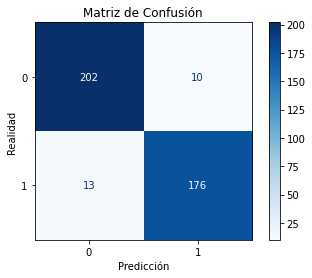

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay.from_estimator(
       clf_best,
       X_test_smote,
       Y_test_smote,
       display_labels=None,
       cmap=plt.cm.Blues,
       normalize=None)

disp.ax_.set_title('Matriz de Confusión')
disp.ax_.set_xlabel('Predicción');
disp.ax_.set_ylabel('Realidad'); 
disp.ax_.xaxis.set_ticklabels(['0', '1']); 
disp.ax_.yaxis.set_ticklabels(['0', '1']);

print('Matriz de Confusión')
print(disp.confusion_matrix)

plt.show()

#SECCION CON DATOS SIN PREPROCESAR

# transformar texto(Embeding) Sin preprocesamiento de texto

In [ ]:
df

,resultado,mensaje
0,0,Free entry in 2 a wkly comp to win FA Cup fina...
1,0,FreeMsg Hey there darling it's been 3 week's n...
2,1,As per your request 'Melle Melle (Oru Minnamin...
3,0,WINNER!! As a valued network customer you have...
4,0,Had your mobile 11 months or more? U R entitle...
...,...,...
1285,0,Had your contract mobile 11 Mnths? Latest Moto...
1286,1,Yeh. Indians was nice. Tho it did kane me off ...
1287,0,REMINDER FROM O2: To get 2.50 pounds free call...
1288,0,This is the 2nd time we have tried 2 contact u...


In [ ]:
# 4to paso: Vamos a crear dos variables que cargaran en memoria dos funciones para transformar el texto
##
##   - preprocessor: "objeto" que se encargará de transformar el texto en el formato que necesita el modelo BERT para funcionar
##   - encoder: "objeto" que será el modelo BERT y se alimentará del resultado de preprocessor, retornando el texto transformado en un vector numérico.

preprocessor = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder = hub.load("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/2")

In [ ]:
# 5to paso: Vamos a usar el objeto preprocessor, y guardamos su resultado en la variable embedding
##   A modo de ejemplo para su revisión, solo vamos a transformar dos textos:

embedding = preprocessor(df['mensaje']) # df['mensaje'] es el texto

In [ ]:
# 6to paso: Vamos a codificar el texto con el modelo BERT:
##   - Fijarse que el objeto encoder recibe como argumento la variable embedding (resultado de preprocessor)
##   - Copiar el siguiente código de forma literal

pooled_output = encoder(embedding)["pooled_output"]

In [ ]:
# Opcional: revisamos el contenido de la variable pooled_output, el cual tiene dos vectores de 128 dimensiones
##
##    - Dos vectores, porque le pasamos solo dos textos
##    - 128 dimensiones, porque el modelo BERT utilizado convierte cualquier texto (independiente del largo) en un vector numérico de 128 dimensiones.

pooled_output

<tf.Tensor: shape=(1290, 128), dtype=float32, numpy=
array([[-0.9999836 ,  0.01233948, -0.97867   , ...,  0.973742  ,
         0.8694874 ,  0.92939764],
       [-0.99979466,  0.05645132, -0.9942094 , ...,  0.8997836 ,
         0.8589003 ,  0.99508   ],
       [-0.99994373,  0.02813301, -0.9845494 , ...,  0.7336781 ,
         0.9590306 ,  0.9695843 ],
       ...,
       [-0.9999937 ,  0.05234575, -0.9969019 , ...,  0.9701582 ,
         0.9953039 ,  0.93751097],
       [-0.9999974 ,  0.08623969, -0.9962204 , ...,  0.9832028 ,
         0.6856057 ,  0.94771725],
       [-0.9996448 ,  0.09184256, -0.9976637 , ...,  0.90646094,
         0.9652779 ,  0.99890375]], dtype=float32)>

In [ ]:
# 7mo paso: El contenido de la variable pooled_output es una estructura de datos de tipo tensorflow.
#           Para transformarlo a un dataframe y usarlo de forma tradicional con los modelos clásicos, 
#           ejecutamos la siguiente linea de código:

dataX2 = pd.DataFrame(pooled_output.numpy())

In [ ]:
# Opcional:  Ahora la variable dataX es un dataframe y podemos revisar su dimensionalidad y visualizarlo:
dataX2.shape

(1290, 128)

In [ ]:
dataX2

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.999984,0.012339,-0.978670,-0.390501,-0.916917,0.785426,-0.960855,-0.899993,-0.026774,0.006909,...,0.102973,-0.997656,0.131492,-0.999817,-0.885076,0.849013,-0.998878,0.973742,0.869487,0.929398
1,-0.999795,0.056451,-0.994209,0.063637,-0.976721,-0.259604,-0.996063,0.210839,0.120435,0.046410,...,0.136751,-0.518643,0.198305,-0.999841,-0.667421,0.978685,-0.995415,0.899784,0.858900,0.995080
2,-0.999944,0.028133,-0.984549,0.188969,-0.981058,-0.075677,-0.987081,-0.971607,-0.040403,-0.020766,...,0.121796,-0.987217,0.160352,-0.999855,-0.689945,0.858107,-0.990487,0.733678,0.959031,0.969584
3,-0.999998,0.087004,-0.998042,0.028922,-0.895981,0.884447,-0.944886,-0.877754,0.108473,0.004284,...,0.142328,-0.998706,0.098014,-0.999967,-0.565350,0.954452,-0.998851,0.997118,0.963491,0.777209
4,-0.999968,0.092309,-0.991751,-0.398493,-0.989488,0.908049,-0.992710,0.105460,0.048611,-0.012153,...,0.218415,-0.997700,0.167798,-0.999842,-0.863140,0.947459,-0.997234,0.991300,0.993118,0.958039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,-0.999991,0.060197,-0.999659,0.075845,-0.996350,0.716204,-0.992615,0.528149,0.107021,-0.010136,...,0.220872,-0.996582,0.114361,-0.999985,-0.912078,0.941813,-0.999059,0.975390,0.980778,0.920063
1286,-0.999953,0.030791,-0.999822,0.927945,-0.999750,-0.179566,-0.987749,0.726748,0.090772,0.035918,...,0.108623,-0.716046,0.121274,-0.999976,-0.861851,0.668276,-0.994187,0.888636,0.890242,0.972008
1287,-0.999994,0.052346,-0.996902,0.245643,-0.920715,0.041507,-0.978795,-0.972810,-0.000673,-0.063252,...,0.127478,-0.997758,0.113584,-0.999896,-0.482480,0.967473,-0.997917,0.970158,0.995304,0.937511
1288,-0.999997,0.086240,-0.996220,0.014216,-0.955859,0.794546,-0.974418,-0.943467,0.073484,0.030729,...,0.147318,-0.997681,0.099959,-0.999969,-0.603682,0.850176,-0.999193,0.983203,0.685606,0.947717


#seleccion de las variable

In [ ]:
X = dataX2 
Y = df['resultado'].copy()

In [ ]:
X.columns

RangeIndex(start=0, stop=128, step=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Columns: 128 entries, 0 to 127
dtypes: float32(128)
memory usage: 645.1 KB


In [ ]:
Y.head()

0    0
1    0
2    1
3    0
4    0
Name: resultado, dtype: int64

# Balanceo de datos

## Aplicando Smote

In [ ]:
from imblearn.over_sampling import SMOTE #over sobre nivelar hacia arriba under nivelacion hacia el menor dato
#from imblearn.under_sampling import SMOTE 

smote = SMOTE(random_state = 325, n_jobs=-1)
X_smote, Y_smote = smote.fit_resample(X, Y)# hace Balance de los datos a partir de los agreglos

from collections import Counter

Counter(Y_smote)

Counter({0: 668, 1: 668})

# Train y test

In [ ]:
from sklearn.model_selection import train_test_split
X_train_smote, X_test_smote, Y_train_smote, Y_test_smote = train_test_split(X_smote, Y_smote, random_state=325,test_size = 0.3)
        
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=325,test_size = 0.3)        

# SVM


##SVC 

### Caso 1

In [ ]:
parametros = {'C'      : np.arange(1, 5, 1),
            'gamma'  : np.arange(1, 5, 1),
           'kernel' : ['rbf', 'linear','sigmoid']}

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clf = SVC(class_weight='balanced', random_state=325)  
grid_search = GridSearchCV(clf, parametros, n_jobs=-1, cv=5) 

In [ ]:
grid_search.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=325),
             n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4]), 'gamma': array([1, 2, 3, 4]),
                         'kernel': ['rbf', 'linear', 'sigmoid']})

In [ ]:
print('El mejor modelo:\n', grid_search.best_params_)

El mejor modelo:
 {'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [ ]:
clf_best = grid_search.best_estimator_
pred = clf_best.predict(X_test_smote)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_smote, pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       212
           1       0.96      0.95      0.95       189

    accuracy                           0.96       401
   macro avg       0.96      0.96      0.96       401
weighted avg       0.96      0.96      0.96       401



Matriz de Confusión
[[204   8]
 [  9 180]]


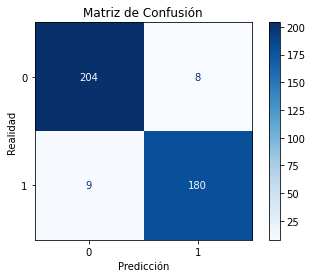

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay.from_estimator(
       clf_best,
       X_test_smote,
       Y_test_smote,
       display_labels=None,
       cmap=plt.cm.Blues,
       normalize=None)

disp.ax_.set_title('Matriz de Confusión')
disp.ax_.set_xlabel('Predicción');
disp.ax_.set_ylabel('Realidad'); 
disp.ax_.xaxis.set_ticklabels(['0', '1']); 
disp.ax_.yaxis.set_ticklabels(['0', '1']);

print('Matriz de Confusión')
print(disp.confusion_matrix)

plt.show()

## Nusvm

### Caso 1

In [ ]:
parametros = {'nu'      : np.arange(0, 1, 0.1),
            'gamma'  : ['scale','auto'],
           'kernel' : ['rbf', 'linear','sigmoid']}

from sklearn.svm import NuSVC
from sklearn.model_selection import GridSearchCV

clf = NuSVC(class_weight='balanced', random_state=325)  
grid_search = GridSearchCV(clf, parametros, n_jobs=-1, cv=5) 

In [ ]:
grid_search.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5, estimator=NuSVC(class_weight='balanced', random_state=325),
             n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'sigmoid'],
                         'nu': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])})

In [ ]:
print('El mejor modelo:\n', grid_search.best_params_)

El mejor modelo:
 {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.1}


In [ ]:
clf_best = grid_search.best_estimator_
pred = clf_best.predict(X_test_smote)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test_smote, pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       212
           1       0.93      0.97      0.95       189

    accuracy                           0.95       401
   macro avg       0.95      0.95      0.95       401
weighted avg       0.95      0.95      0.95       401



Matriz de Confusión
[[199  13]
 [  6 183]]


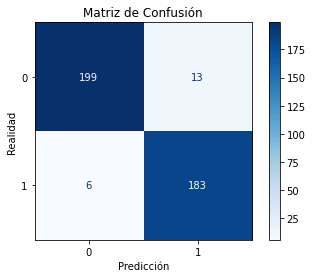

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay.from_estimator(
       clf_best,
       X_test_smote,
       Y_test_smote,
       display_labels=None,
       cmap=plt.cm.Blues,
       normalize=None)

disp.ax_.set_title('Matriz de Confusión')
disp.ax_.set_xlabel('Predicción');
disp.ax_.set_ylabel('Realidad'); 
disp.ax_.xaxis.set_ticklabels(['0', '1']); 
disp.ax_.yaxis.set_ticklabels(['0', '1']);

print('Matriz de Confusión')
print(disp.confusion_matrix)

plt.show()